<h1>WGU D212 TASK 3 REV 1 - MATTINSON</h1>

## update/install required packages

In [1]:
# upgrade pip
!python -m pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.1
    Uninstalling pip-22.1:
      Successfully uninstalled pip-22.1


In [ ]:
# upgrade/install mlxtend
!python -m pip install --upgrade mlxtend

In [ ]:
#External package need to install
!pip install apyori

## import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#from apyori import apriori as apy

## raw data

In [2]:
# load data from .csv & show first few records
raw = pd.read_csv('data/teleco_market_basket.csv',
         skiprows=lambda x: x % 2) # remove every other blank row
#raw.fillna(0,inplace=True) # replace empty value with 0
raw.iloc[[25]].T

,25
Item01,PS4 Headset
Item02,VIVO Dual LCD Monitor Desk mount
Item03,10ft iPHone Charger Cable 2 Pack
Item04,HP 65 ink
Item05,Screen Mom Screen Cleaner kit
Item06,SanDisk 128GB microSDXC card
Item07,NaN
Item08,NaN
Item09,NaN
Item10,NaN


## clean data

In [3]:
# dataframe structure
print(raw.info())
print('{} empty rows.'.format(raw.isna().all(axis=1).sum()))
print(raw.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB
None
0 empty rows.
(7501, 20)


In [4]:
raw.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
1,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(raw.dtypes)

Item01    object
Item02    object
Item03    object
Item04    object
Item05    object
Item06    object
Item07    object
Item08    object
Item09    object
Item10    object
Item11    object
Item12    object
Item13    object
Item14    object
Item15    object
Item16    object
Item17    object
Item18    object
Item19    object
Item20    object
dtype: object


In [6]:
print(len(raw))
print(raw.shape)

7501
(7501, 20)


In [7]:
#converting dataframe into list of lists
outside = len(raw)
inside = raw.shape[1]
transactions = []
for i in range(0,outside):
    transactions.append([str(raw.values[i,j]) 
        for j in range(0,inside)])
TE = TransactionEncoder()
array = TE.fit_transform(transactions)
#array = array.astype(int)

In [8]:
print(TE.columns_)
print(len(TE.columns_))

['10ft iPHone Charger Cable', '10ft iPHone Charger Cable 2 Pack', '3 pack Nylon Braided Lightning Cable', '3A USB Type C Cable 3 pack 6FT', '5pack Nylon Braided USB C cables', 'ARRIS SURFboard SB8200 Cable Modem', 'Anker 2-in-1 USB Card Reader', 'Anker 4-port USB hub', 'Anker USB C to HDMI Adapter', 'Apple Lightning to Digital AV Adapter', 'Apple Lightning to USB cable', 'Apple Magic Mouse 2', 'Apple Pencil', 'Apple Pencil 2nd Gen', 'Apple Power Adapter Extension Cable', 'Apple USB-C Charger cable', 'AutoFocus 1080p Webcam', 'BENGOO G90000 headset', 'Blue Light Blocking Glasses', 'Blue Light Blocking Glasses 2pack', 'Brother Genuine High Yield Toner Cartridge', 'Cat 6 Ethernet Cable 50ft', 'Cat8 Ethernet Cable', 'CicTsing MM057 2.4G Wireless Mouse', 'Cleaning Gel Universal Dust Cleaner', 'Creative Pebble 2.0 Speakers', 'DisplayPort ot HDMI adapter', 'Dust-Off Compressed Gas', 'Dust-Off Compressed Gas 2 pack', 'FEEL2NICE 5 pack 10ft Lighning cable', 'FEIYOLD Blue light Blocking Glasses'

In [9]:
array.shape

(7501, 120)

In [10]:
# create cleaned dataframe
df = pd.DataFrame(array, 
        columns=TE.columns_)
df = df.drop(['nan'],axis=1) #drop 'nan' blank column
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 119 entries, 10ft iPHone Charger Cable to seenda Wireless mouse
dtypes: bool(119)
memory usage: 871.8 KB
None
(7501, 119)


In [11]:
df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# final dataframe ready for market basket analysis
df.info()
df.head(4).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 119 entries, 10ft iPHone Charger Cable to seenda Wireless mouse
dtypes: bool(119)
memory usage: 871.8 KB


,0,1,2,3
10ft iPHone Charger Cable,True,False,False,False
10ft iPHone Charger Cable 2 Pack,False,False,False,False
3 pack Nylon Braided Lightning Cable,False,False,False,False
3A USB Type C Cable 3 pack 6FT,True,False,False,False
5pack Nylon Braided USB C cables,False,False,False,False
...,...,...,...,...
iPhone 12 case,False,False,False,False
iPhone Charger Cable Anker 6ft,False,False,False,False
iPhone SE case,False,False,False,False
nonda USB C to USB Adapter,True,False,False,False


## export data

In [13]:
# export clean data ready for market basket analysis
df.to_csv('tables\d212_3_1_cleaned.csv', index=False, header=True)
print(df.info())
print(df.shape)
df.head(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 119 entries, 10ft iPHone Charger Cable to seenda Wireless mouse
dtypes: bool(119)
memory usage: 871.8 KB
None
(7501, 119)


,0,1,2,3,4
10ft iPHone Charger Cable,True,False,False,False,False
10ft iPHone Charger Cable 2 Pack,False,False,False,False,False
3 pack Nylon Braided Lightning Cable,False,False,False,False,False
3A USB Type C Cable 3 pack 6FT,True,False,False,False,False
5pack Nylon Braided USB C cables,False,False,False,False,False
...,...,...,...,...,...
iPhone 12 case,False,False,False,False,False
iPhone Charger Cable Anker 6ft,False,False,False,False,False
iPhone SE case,False,False,False,False,False
nonda USB C to USB Adapter,True,False,False,False,False


## create association rules

In [14]:
# define which columns to include in printouts
output_cols = ['antecedents','consequents','support',
               'confidence','lift']

## min_sup 4/100 - min_lift 1 (sorted by lift)

In [17]:
# min_sup 4/100 - min_lift 1 (sorted by lift)
itemsets = apriori(df, min_support=3/1000, use_colnames=True)
rules = association_rules(itemsets, metric='lift', min_threshold=3)
rules[output_cols].sort_values(by=['lift'], ascending=False).round(3).head(20)

,antecedents,consequents,support,confidence,lift
197,"(10ft iPHone Charger Cable 2 Pack, Nylon Braid...","(Dust-Off Compressed Gas 2 pack, Screen Mom Sc...",0.003,0.383,7.987
192,"(Dust-Off Compressed Gas 2 pack, Screen Mom Sc...","(10ft iPHone Charger Cable 2 Pack, Nylon Braid...",0.003,0.064,7.987
270,"(FEIYOLD Blue light Blocking Glasses, Nylon Br...","(Dust-Off Compressed Gas 2 pack, Screen Mom Sc...",0.003,0.294,6.128
265,"(Dust-Off Compressed Gas 2 pack, Screen Mom Sc...","(FEIYOLD Blue light Blocking Glasses, Nylon Br...",0.003,0.069,6.128
53,"(Dust-Off Compressed Gas 2 pack, Anker 2-in-1 ...",(FEIYOLD Blue light Blocking Glasses),0.004,0.403,6.116
54,(FEIYOLD Blue light Blocking Glasses),"(Dust-Off Compressed Gas 2 pack, Anker 2-in-1 ...",0.004,0.059,6.116
295,"(Nylon Braided Lightning to USB cable, HP 61 ink)","(Dust-Off Compressed Gas 2 pack, Logitech M510...",0.003,0.140,5.913
290,"(Dust-Off Compressed Gas 2 pack, Logitech M510...","(Nylon Braided Lightning to USB cable, HP 61 ink)",0.003,0.136,5.913
194,"(Dust-Off Compressed Gas 2 pack, Nylon Braided...","(Screen Mom Screen Cleaner kit, 10ft iPHone Ch...",0.003,0.086,5.647
195,"(Screen Mom Screen Cleaner kit, 10ft iPHone Ch...","(Dust-Off Compressed Gas 2 pack, Nylon Braided...",0.003,0.202,5.647


## min_sup 3/1000 - min_conf 3/10 (sorted by lift)

In [18]:
# min_sup 3/1000 - min_conf 3/10 (sorted by lift)
pd.set_option('display.max_colwidth', None)
itemsets = apriori(df, min_support=3/1000, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=3/10)
rules[output_cols].sort_values(by=['lift'], ascending=False).round(3).head(8)

,antecedents,consequents,support,confidence,lift
556,"(10ft iPHone Charger Cable 2 Pack, Nylon Braided Lightning to USB cable)","(Dust-Off Compressed Gas 2 pack, Screen Mom Screen Cleaner kit)",0.003,0.383,7.987
134,"(Dust-Off Compressed Gas 2 pack, Anker 2-in-1 USB Card Reader)",(FEIYOLD Blue light Blocking Glasses),0.004,0.403,6.116
283,"(VIVO Dual LCD Monitor Desk mount, AutoFocus 1080p Webcam)",(SanDisk Ultra 64GB card),0.003,0.489,4.981
78,(iPhone 11 case),(HP 63XL Ink),0.006,0.373,4.701
530,"(SanDisk 128GB Ultra microSDXC card, USB 2.0 Printer cable)",(SanDisk Ultra 64GB card),0.003,0.462,4.697
546,"(VIVO Dual LCD Monitor Desk mount, iPhone Charger Cable Anker 6ft)",(SanDisk Ultra 64GB card),0.003,0.460,4.682
554,"(Dust-Off Compressed Gas 2 pack, 10ft iPHone Charger Cable 2 Pack, Nylon Braided Lightning to USB cable)",(Screen Mom Screen Cleaner kit),0.003,0.605,4.671
609,"(Dust-Off Compressed Gas 2 pack, Nylon Braided Lightning to USB cable, HP 61 ink)",(Logitech M510 Wireless mouse),0.003,0.329,4.601


## min_sup 1/100 - min_conf 1/100 (sorted by support)

In [19]:
item1 = 'Dust-Off Compressed Gas 2 pack'
item2 = 'VIVO Dual LCD Monitor Desk mount'
itemset = [item1, item2]
print('item1: ', len(df[itemset][(df[item1] == True) ]))
print('item2: ', len(df[itemset][(df[item2] == True) ]))
print('both: ', len(df[itemset][(df[item1] == True) & (df[item2] == True)]))

item1:  1788
item2:  1306
both:  448


In [20]:
# min_sup 1/100 - min_conf 1/100 (sorted by support)
pd.set_option('display.max_colwidth', None)
itemsets = apriori(df, min_support=1/100, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', 
                min_threshold=1/100)
rules[output_cols].sort_values(by=['support'], 
            ascending=False).round(5).head(10)

,antecedents,consequents,support,confidence,lift
179,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.05973,0.34303,1.43909
178,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.05973,0.25056,1.43909
143,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.05266,0.32140,1.34833
142,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.05266,0.22092,1.34833
62,(Dust-Off Compressed Gas 2 pack),(Apple Pencil),0.05093,0.21365,1.18884
63,(Apple Pencil),(Dust-Off Compressed Gas 2 pack),0.05093,0.28338,1.18884
168,(Dust-Off Compressed Gas 2 pack),(Screen Mom Screen Cleaner kit),0.04799,0.20134,1.55377
169,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.04799,0.37037,1.55377
167,(Dust-Off Compressed Gas 2 pack),(SanDisk Ultra 64GB card),0.04093,0.17170,1.74752
166,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.04093,0.41655,1.74752


## min_sup 1/100 - min_conf 1/100 (sorted by confidence)

In [21]:
# min_sup 1/100 - min_conf 1/100 (sorted by confidence)
pd.set_option('display.max_colwidth', None)
itemsets = apriori(df, min_support=1/100, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', 
                min_threshold=1/100)
rules[output_cols].sort_values(by=['confidence'], 
            ascending=False).round(3).head(20)

,antecedents,consequents,support,confidence,lift
337,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.010,0.507,2.126
397,"(SanDisk Ultra 64GB card, Screen Mom Screen Cleaner kit)",(Dust-Off Compressed Gas 2 pack),0.011,0.503,2.110
367,"(SanDisk Ultra 64GB card, HP 61 ink)",(Dust-Off Compressed Gas 2 pack),0.011,0.474,1.988
386,"(Screen Mom Screen Cleaner kit, Nylon Braided Lightning to USB cable)",(Dust-Off Compressed Gas 2 pack),0.011,0.469,1.967
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.023,0.456,1.915
414,"(Stylus Pen for iPad, VIVO Dual LCD Monitor Desk mount)",(Dust-Off Compressed Gas 2 pack),0.011,0.455,1.909
362,"(VIVO Dual LCD Monitor Desk mount, FEIYOLD Blue light Blocking Glasses)",(Dust-Off Compressed Gas 2 pack),0.010,0.448,1.878
410,"(Screen Mom Screen Cleaner kit, VIVO Dual LCD Monitor Desk mount)",(Dust-Off Compressed Gas 2 pack),0.016,0.444,1.861
374,"(Screen Mom Screen Cleaner kit, HP 61 ink)",(Dust-Off Compressed Gas 2 pack),0.014,0.436,1.828
403,"(SanDisk Ultra 64GB card, VIVO Dual LCD Monitor Desk mount)",(Dust-Off Compressed Gas 2 pack),0.017,0.435,1.826


## min_sup 1/100 - min_conf 1/100 (sorted by lift)

In [22]:
# min_sup 1/100 - min_conf 1/100 (sorted by lift)
pd.set_option('display.max_colwidth', None)
itemsets = apriori(df, min_support=1/100, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', 
                min_threshold=1/100)
rules[output_cols].sort_values(by=['lift'], 
            ascending=False).round(3).head()

,antecedents,consequents,support,confidence,lift
283,(SanDisk 128GB Ultra microSDXC card),(SanDisk Ultra 64GB card),0.016,0.323,3.292
282,(SanDisk Ultra 64GB card),(SanDisk 128GB Ultra microSDXC card),0.016,0.163,3.292
404,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD Monitor Desk mount)",(SanDisk Ultra 64GB card),0.017,0.286,2.908
405,(SanDisk Ultra 64GB card),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD Monitor Desk mount)",0.017,0.174,2.908
360,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD Monitor Desk mount)",(FEIYOLD Blue light Blocking Glasses),0.010,0.172,2.610


In [24]:
# pruning
pruned_rules = rules[rules['confidence']>0.02]
print('only {} pru_r are left.'.format(len(pruned_rules)))

only 432 pru_r are left.


## top 3 rules sorted by lift

In [25]:
# top 3 rules sorted by lift
pd.set_option('display.max_colwidth', None)
itemsets = apriori(df, min_support=3/1000, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=4/10)
rules[output_cols].sort_values(by=['lift'], 
            ascending=False).round(3).head(3)

,antecedents,consequents,support,confidence,lift
38,"(Dust-Off Compressed Gas 2 pack, Anker 2-in-1 USB Card Reader)",(FEIYOLD Blue light Blocking Glasses),0.004,0.403,6.116
91,"(VIVO Dual LCD Monitor Desk mount, AutoFocus 1080p Webcam)",(SanDisk Ultra 64GB card),0.003,0.489,4.981
206,"(SanDisk 128GB Ultra microSDXC card, USB 2.0 Printer cable)",(SanDisk Ultra 64GB card),0.003,0.462,4.697


## Strength of association using heatmap 

https://medium.com/analytics-vidhya/market-basket-analysis-association-rule-mining-with-visualizations-cda24d537019

In [26]:
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import altair as alt
#import plotly.express as px
#from wordcloud import WordCloud,STOPWORDS
#import holoviews as hv
#from holoviews import opts
#hv.extension('bokeh')

In [27]:
itemsets = apriori(df, min_support=3/1000, use_colnames=True)
rules = association_rules(itemsets, metric='lift', 
                min_threshold=5)

rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


In [28]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
0,(HyperX Cloud Stinger Headset),(SanDisk Ultra 400GB card),0.047460,0.013598,0.003333,0.070225,5.164271,0.002688,1.060903,1,HyperX Cloud Stinger Headset,SanDisk Ultra 400GB card
1,(SanDisk Ultra 400GB card),(HyperX Cloud Stinger Headset),0.013598,0.047460,0.003333,0.245098,5.164271,0.002688,1.261806,1,SanDisk Ultra 400GB card,HyperX Cloud Stinger Headset
2,"(Dust-Off Compressed Gas 2 pack, Anker 2-in-1 USB Card Reader)",(FEIYOLD Blue light Blocking Glasses),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145,2,"Dust-Off Compressed Gas 2 pack,Anker 2-in-1 USB Card Reader",FEIYOLD Blue light Blocking Glasses
3,(FEIYOLD Blue light Blocking Glasses),"(Dust-Off Compressed Gas 2 pack, Anker 2-in-1 USB Card Reader)",0.065858,0.009599,0.003866,0.058704,6.115863,0.003234,1.052168,1,FEIYOLD Blue light Blocking Glasses,"Dust-Off Compressed Gas 2 pack,Anker 2-in-1 USB Card Reader"
4,"(SanDisk Ultra 64GB card, VIVO Dual LCD Monitor Desk mount)",(AutoFocus 1080p Webcam),0.039195,0.014131,0.003066,0.078231,5.535971,0.002512,1.069540,2,"SanDisk Ultra 64GB card,VIVO Dual LCD Monitor Desk mount",AutoFocus 1080p Webcam
5,(AutoFocus 1080p Webcam),"(SanDisk Ultra 64GB card, VIVO Dual LCD Monitor Desk mount)",0.014131,0.039195,0.003066,0.216981,5.535971,0.002512,1.227052,1,AutoFocus 1080p Webcam,"SanDisk Ultra 64GB card,VIVO Dual LCD Monitor Desk mount"
6,"(Dust-Off Compressed Gas 2 pack, Screen Mom Screen Cleaner kit, Nylon Braided Lightning to USB cable)",(10ft iPHone Charger Cable 2 Pack),0.011065,0.050527,0.003066,0.277108,5.484407,0.002507,1.313438,3,"Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Nylon Braided Lightning to USB cable",10ft iPHone Charger Cable 2 Pack
7,"(Dust-Off Compressed Gas 2 pack, Screen Mom Screen Cleaner kit)","(10ft iPHone Charger Cable 2 Pack, Nylon Braided Lightning to USB cable)",0.047994,0.007999,0.003066,0.063889,7.987176,0.002682,1.059704,2,"Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit","10ft iPHone Charger Cable 2 Pack,Nylon Braided Lightning to USB cable"
8,"(Dust-Off Compressed Gas 2 pack, 10ft iPHone Charger Cable 2 Pack)","(Screen Mom Screen Cleaner kit, Nylon Braided Lightning to USB cable)",0.023064,0.023597,0.003066,0.132948,5.634140,0.002522,1.126118,2,"Dust-Off Compressed Gas 2 pack,10ft iPHone Charger Cable 2 Pack","Screen Mom Screen Cleaner kit,Nylon Braided Lightning to USB cable"
9,"(Dust-Off Compressed Gas 2 pack, Nylon Braided Lightning to USB cable)","(Screen Mom Screen Cleaner kit, 10ft iPHone Charger Cable 2 Pack)",0.035729,0.015198,0.003066,0.085821,5.646864,0.002523,1.077253,2,"Dust-Off Compressed Gas 2 pack,Nylon Braided Lightning to USB cable","Screen Mom Screen Cleaner kit,10ft iPHone Charger Cable 2 Pack"


In [29]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>=1].pivot(index = 'antecedents_', 
            columns = 'consequents_', values= 'lift')
pivot

consequents_,10ft iPHone Charger Cable 2 Pack,"10ft iPHone Charger Cable 2 Pack,Nylon Braided Lightning to USB cable",AutoFocus 1080p Webcam,"Dust-Off Compressed Gas 2 pack,10ft iPHone Charger Cable 2 Pack","Dust-Off Compressed Gas 2 pack,Anker 2-in-1 USB Card Reader","Dust-Off Compressed Gas 2 pack,FEIYOLD Blue light Blocking Glasses","Dust-Off Compressed Gas 2 pack,Logitech M510 Wireless mouse","Dust-Off Compressed Gas 2 pack,Nylon Braided Lightning to USB cable","Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit","Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Nylon Braided Lightning to USB cable",...,"Nylon Braided Lightning to USB cable,HP 61 ink",SanDisk Ultra 400GB card,"SanDisk Ultra 64GB card,Nylon Braided Lightning to USB cable","SanDisk Ultra 64GB card,Screen Mom Screen Cleaner kit","SanDisk Ultra 64GB card,VIVO Dual LCD Monitor Desk mount","Screen Mom Screen Cleaner kit,10ft iPHone Charger Cable 2 Pack","Screen Mom Screen Cleaner kit,FEIYOLD Blue light Blocking Glasses","Screen Mom Screen Cleaner kit,Nylon Braided Lightning to USB cable","Screen Mom Screen Cleaner kit,VIVO Dual LCD Monitor Desk mount","VIVO Dual LCD Monitor Desk mount,Nylon Braided Lightning to USB cable"
antecedents_,,,,,,,,,,,,,,,,,,,,,
10ft iPHone Charger Cable 2 Pack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.484407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"10ft iPHone Charger Cable 2 Pack,Nylon Braided Lightning to USB cable",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.987176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AutoFocus 1080p Webcam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.535971,NaN,NaN,NaN,NaN,NaN
"Dust-Off Compressed Gas 2 pack,10ft iPHone Charger Cable 2 Pack",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.63414,NaN,NaN
"Dust-Off Compressed Gas 2 pack,Anker 2-in-1 USB Card Reader",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Dust-Off Compressed Gas 2 pack,FEIYOLD Blue light Blocking Glasses",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.11818,NaN,NaN
"Dust-Off Compressed Gas 2 pack,Logitech M510 Wireless mouse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.913283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.069202
"Dust-Off Compressed Gas 2 pack,Nylon Braided Lightning to USB cable",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.646864,5.466564,NaN,NaN,NaN
"Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit",NaN,7.987176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


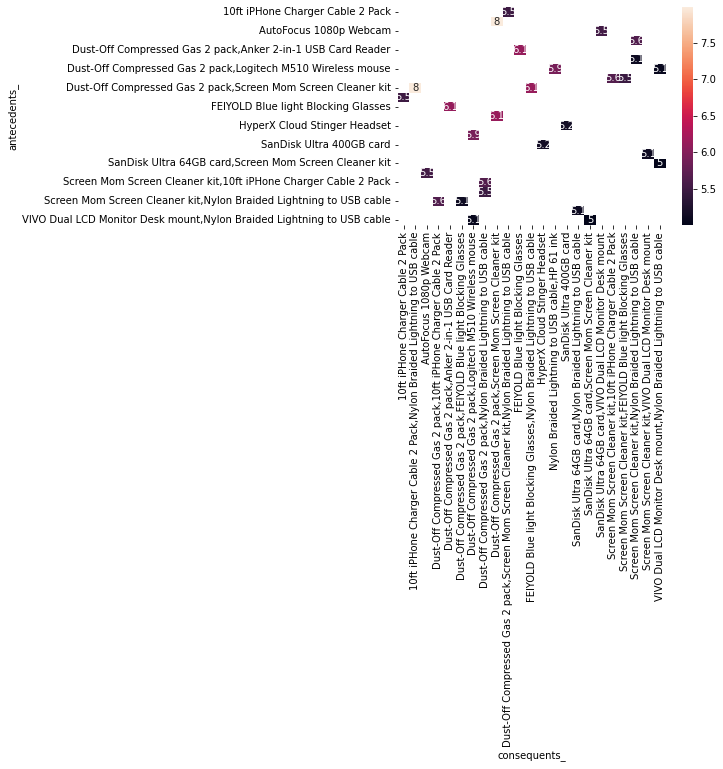

In [30]:
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()